# Sentiment Analysis using text data

Multiclass Classification

5 Classes -> Sadness, Anger, Love, Fear, Joy

# Part 1

Text preprocessing

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset from the files

print("TRAIN Dataset")
df_train = pd.read_csv('emotions/train.txt', sep=';', names=['sentence', 'tag'])
print(df_train.head())

print()
print("TEST Dataset")
df_test = pd.read_csv('emotions/test.txt', sep=';', names=['sentence', 'tag'])
print(df_test.head())

print()
print("VALIDATION Dataset")
df_val = pd.read_csv('emotions/val.txt', sep=';', names=['sentence', 'tag'])
print(df_val.head())

TRAIN Dataset
                                            sentence      tag
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

TEST Dataset
                                            sentence      tag
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness

VALIDATION Dataset
                                            sentence      tag
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     

In [3]:
#printing unique elements (classes)
df_train['tag'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [4]:
#count the number of examples of each class
df_train['tag'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: tag, dtype: int64

In [5]:
# checking for null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   tag       16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


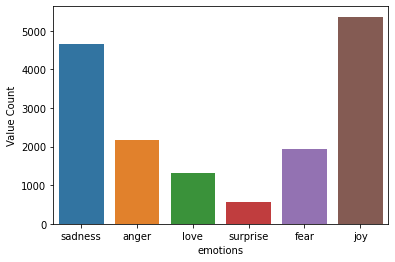

In [6]:
#ploting the number of examples for each sample
ax = sns.countplot(x = df_train.tag)
ax.set_xlabel("emotions")
ax.set_ylabel("Value Count")

plt.show()

In [7]:
# Very less dataset for surprise, hence neglect the surprise class
INTERESTED_LABELS = ['sadness', 'anger', 'love', 'fear', 'joy']
df_train = df_train[df_train.tag.isin(INTERESTED_LABELS)]
print(df_train.shape)
print(df_train.head())

(15428, 2)
                                            sentence      tag
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


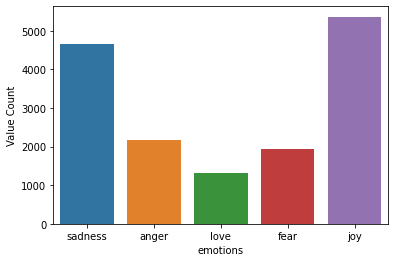

In [8]:
ax = sns.countplot(x = df_train.tag)
ax.set_xlabel("emotions")
ax.set_ylabel("Value Count")

plt.show()

In [9]:
# Remove punctuations
# library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df_train['clean_sen']= df_train['sentence'].apply(lambda x:remove_punctuation(x))
df_train.head()

,sentence,tag,clean_sen
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


In [11]:
# BoW Encoding (Count Vectorizer)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train.clean_sen)
print(vectorizer.get_feature_names()[100:150])

['accurate', 'accurately', 'accused', 'accuser', 'accusing', 'accustomed', 'ace', 'ache', 'ached', 'acheivment', 'aches', 'achieve', 'achieved', 'achievement', 'achievements', 'achieving', 'aching', 'achy', 'acim', 'acker', 'acknowledge', 'acknowledged', 'acknowledgement', 'acknowledgment', 'acne', 'aconfident', 'acquaint', 'acquaintances', 'acquainted', 'acquire', 'acronym', 'across', 'act', 'actauly', 'acted', 'acting', 'action', 'actions', 'activations', 'active', 'actively', 'activism', 'activist', 'activities', 'activity', 'actor', 'actors', 'actresses', 'acts', 'actual']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X.toarray().shape

(15428, 14891)

In [13]:
print(1 in X.toarray())

True


In [14]:
np.unique(X.toarray(), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([229498022,    222209,     15067,      2415,       467,       118,
               34,        11,         1,         1,         3]))

In [15]:
# label encoder for tag column
def encoder(df, col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    return df

df_train = encoder(df_train, 'tag')
print(df_train.head())

y = df_train.tag
print(y.shape)

                                            sentence  tag  \
0                            i didnt feel humiliated    4   
1  i can go from feeling so hopeless to so damned...    4   
2   im grabbing a minute to post i feel greedy wrong    0   
3  i am ever feeling nostalgic about the fireplac...    3   
4                               i am feeling grouchy    0   

                                           clean_sen  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy  
(15428,)


In [16]:
# convert X to an numpy array
X = X.toarray()

In [17]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 0        4
 1        4
 2        0
 3        3
 4        0
         ..
 15995    4
 15996    4
 15997    2
 15998    0
 15999    4
 Name: tag, Length: 15428, dtype: int8)

# Part 2

Model (Building and Training)

In [18]:
# importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# defining and training the model
clf = LogisticRegression(random_state=0).fit(X, y)

#Accuracy of trained model
print("Accuracy: ", clf.score(X, y))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9888514389421831


In [19]:
# making predictions
y_pred = clf.predict(X)

# accuracy on training data
scoreTrain = clf.score(X, y)
print(f"Train accuracy {scoreTrain * 100,0} %")

Train accuracy (98.8851438942183, 0) %


In [20]:
# Calculating Root mean Squared error of the model
print('Root MSE = ', math.sqrt(metrics.mean_squared_error(y, y_pred)))

Root MSE =  0.2563682048709592


In [21]:
# Intercept
print('Intercept = ', clf.intercept_)

Intercept =  [ 0.17543988 -0.11293108  0.75130644 -1.36911096  0.55529572]


In [22]:
# Confusion metrix 
print('Confusion = \n{}'.format(metrics.confusion_matrix(y, y_pred, labels=[0,1,2,3,4])))

Confusion = 
[[2122    9    3    0   25]
 [  14 1910    3    0   10]
 [   1    7 5321   22   11]
 [   2    0   31 1270    1]
 [  15   10    7    1 4633]]


In [23]:
# Classification report (precision, recall, f1-score)
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2159
           1       0.99      0.99      0.99      1937
           2       0.99      0.99      0.99      5362
           3       0.98      0.97      0.98      1304
           4       0.99      0.99      0.99      4666

    accuracy                           0.99     15428
   macro avg       0.99      0.99      0.99     15428
weighted avg       0.99      0.99      0.99     15428



# Part 3

Testing

In [24]:
# checking test data for null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   tag       2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [25]:
# Very less dataset for surprise
INTERESTED_LABELS = ['sadness', 'anger', 'love', 'fear', 'joy']
df_test = df_test[df_test.tag.isin(INTERESTED_LABELS)]
print(df_test.shape)
print(df_test.head())

(1934, 2)
                                            sentence      tag
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [26]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df_test['clean_sen']= df_test['sentence'].apply(lambda x:remove_punctuation(x))
df_test.head()

,sentence,tag,clean_sen
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty,sadness,im updating my blog because i feel shitty
2,i never make her separate from me because i do...,sadness,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...,joy,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one,sadness,i was feeling a little vain when i did this one


In [27]:
# Vectorization of input text, to feed to Machine Learning model
X_test = vectorizer.transform(df_test.clean_sen)
print(vectorizer.get_feature_names()[100:150])

['accurate', 'accurately', 'accused', 'accuser', 'accusing', 'accustomed', 'ace', 'ache', 'ached', 'acheivment', 'aches', 'achieve', 'achieved', 'achievement', 'achievements', 'achieving', 'aching', 'achy', 'acim', 'acker', 'acknowledge', 'acknowledged', 'acknowledgement', 'acknowledgment', 'acne', 'aconfident', 'acquaint', 'acquaintances', 'acquainted', 'acquire', 'acronym', 'across', 'act', 'actauly', 'acted', 'acting', 'action', 'actions', 'activations', 'active', 'actively', 'activism', 'activist', 'activities', 'activity', 'actor', 'actors', 'actresses', 'acts', 'actual']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# encding the tags
def encoder(df, col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    return df

df_test = encoder(df_test, 'tag')
print(df_test.head())

y_test = df_test.tag
print(y_test.shape)

                                            sentence  tag  \
0  im feeling rather rotten so im not very ambiti...    4   
1          im updating my blog because i feel shitty    4   
2  i never make her separate from me because i do...    4   
3  i left with my bouquet of red and yellow tulip...    2   
4    i was feeling a little vain when i did this one    4   

                                           clean_sen  
0  im feeling rather rotten so im not very ambiti...  
1          im updating my blog because i feel shitty  
2  i never make her separate from me because i do...  
3  i left with my bouquet of red and yellow tulip...  
4    i was feeling a little vain when i did this one  
(1934,)


In [29]:
# X_test to numpy array
X_test = X_test.toarray()

# shape of X and y
print(X_test.shape, y_test.shape)
X_test, y_test

(1934, 14891) (1934,)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 0       4
 1       4
 2       4
 3       2
 4       4
        ..
 1995    0
 1996    0
 1997    2
 1998    2
 1999    1
 Name: tag, Length: 1934, dtype: int8)

In [30]:
# making the prediction using the trained model
y_pred = clf.predict(X_test)

# accuracy of the model
scoreTrain = clf.score(X_test, y_test)
print(f"Train accuracy {round(scoreTrain * 100,0)} %")

Train accuracy 90.0 %


# Part 4

Saving model and vectorizer

Custom Input

In [31]:
# Checking for values in test dataset and there tags
print(df_test.sentence[34], df_test.tag[34])

i feel like i m defective or something for not having baby fever 4


In [32]:
df_train[df_train.tag == 'joy']
df_train.sentence[8]

'i have been with petronas for years i feel that petronas has performed well and made a huge profit'

In [33]:
print(y.unique())
df_train.tag.unique()

[4 0 3 1 2]


array([4, 0, 3, 1, 2], dtype=int8)

In [34]:
#saving vectorizer and model for later use
import pickle

with open('finalized_model.pkl', 'wb') as fout:
    pickle.dump((vectorizer, clf), fout)

In [35]:
#calling the saved model and vectorizer
import pickle

with open('finalized_model.pkl', 'rb') as f:
    vectorizer, clf = pickle.load(f)

In [36]:
# dictionary (convert the numeric result back to text)
dic = {4: 'sadness', 3:'anger', 1:'love', 0:'fear', 2:'joy'}
dic

{4: 'sadness', 3: 'anger', 1: 'love', 0: 'fear', 2: 'joy'}

In [37]:
# taking input sentence from the user
sen = input()

In [38]:
sen

'Fealing awesome'

In [39]:
import string

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

pun_sen = remove_punctuation(sen)

vec_sen = vectorizer.transform([pun_sen])

y_pred = clf.predict(vec_sen)
print(f'Input sentence: {sen}')
print("Prediction: ", dic[y_pred[0]])

Input sentence: Fealing awesome
Prediction:  joy
